In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_random_seed(RANDOM_SEED)

C:\Users\lrmen\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lrmen\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lrmen\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lrmen\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# Load Model
new_model = tf.keras.models.load_model('model_multivariable_500epo_16timesteps')

# Check its architecture
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection multiple                  140288    
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  257       
Total params: 140,545
Trainable params: 140,

In [3]:
# dataset_grouped_by_hour_boolean
df = pd.read_csv(
  "../../dataset_grouped_by_hour_boolean.csv", 
  parse_dates=['timeFrom'], 
  index_col="timeFrom"
)
df

,isWeekday,isRain,isHoliday,TotalParkings
timeFrom,,,,
2013-01-01 07:00:00,1,0,1,13
2013-01-01 08:00:00,1,0,1,21
2013-01-01 09:00:00,1,0,1,16
2013-01-01 10:00:00,1,0,1,17
2013-01-01 11:00:00,1,0,1,18
...,...,...,...,...
2017-12-31 18:00:00,0,0,0,25
2017-12-31 19:00:00,0,0,0,22
2017-12-31 20:00:00,0,0,0,21


In [4]:
# Remove the time data from closed parking
df = df[df['TotalParkings'] > 0]
df

,isWeekday,isRain,isHoliday,TotalParkings
timeFrom,,,,
2013-01-01 07:00:00,1,0,1,13
2013-01-01 08:00:00,1,0,1,21
2013-01-01 09:00:00,1,0,1,16
2013-01-01 10:00:00,1,0,1,17
2013-01-01 11:00:00,1,0,1,18
...,...,...,...,...
2017-12-31 18:00:00,0,0,0,25
2017-12-31 19:00:00,0,0,0,22
2017-12-31 20:00:00,0,0,0,21


In [5]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

df

C:\Users\lrmen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lrmen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lrmen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,isWeekday,isRain,isHoliday,TotalParkings,hour,day_of_month,day_of_week,month
timeFrom,,,,,,,,
2013-01-01 07:00:00,1,0,1,13,7,1,1,1
2013-01-01 08:00:00,1,0,1,21,8,1,1,1
2013-01-01 09:00:00,1,0,1,16,9,1,1,1
2013-01-01 10:00:00,1,0,1,17,10,1,1,1
2013-01-01 11:00:00,1,0,1,18,11,1,1,1
...,...,...,...,...,...,...,...,...
2017-12-31 18:00:00,0,0,0,25,18,31,6,12
2017-12-31 19:00:00,0,0,0,22,19,31,6,12
2017-12-31 20:00:00,0,0,0,21,20,31,6,12


In [6]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

26294 2922


In [7]:
from sklearn.preprocessing import RobustScaler

cnt_transformer = RobustScaler()
cnt_transformer = cnt_transformer.fit(train[['TotalParkings']])
test['TotalParkings'] = cnt_transformer.transform(test[['TotalParkings']])

print("DONE")

DONE


C:\Users\lrmen\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
test

,isWeekday,isRain,isHoliday,TotalParkings,hour,day_of_month,day_of_week,month
timeFrom,,,,,,,,
2017-07-02 13:00:00,0,1,0,0.233333,13,2,6,7
2017-07-02 14:00:00,0,1,0,-0.500000,14,2,6,7
2017-07-02 15:00:00,0,1,0,-0.700000,15,2,6,7
2017-07-02 16:00:00,0,1,0,-0.533333,16,2,6,7
2017-07-02 17:00:00,0,1,0,-0.566667,17,2,6,7
...,...,...,...,...,...,...,...,...
2017-12-31 18:00:00,0,0,0,-0.433333,18,31,6,12
2017-12-31 19:00:00,0,0,0,-0.533333,19,31,6,12
2017-12-31 20:00:00,0,0,0,-0.566667,20,31,6,12


In [10]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 16 #16 * 7

# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.TotalParkings, time_steps)
X_test, y_test = create_dataset(test, test.TotalParkings, time_steps)

print(X_train.shape)

(26278, 16, 8)


In [12]:
y_pred = new_model.predict(X_test)
y_pred

array([[-0.05536266],
       [ 0.13429147],
       [ 0.3911802 ],
       ...,
       [-0.67259306],
       [-0.6839339 ],
       [-0.85700005]], dtype=float32)

In [14]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
print("Done!")

Done!


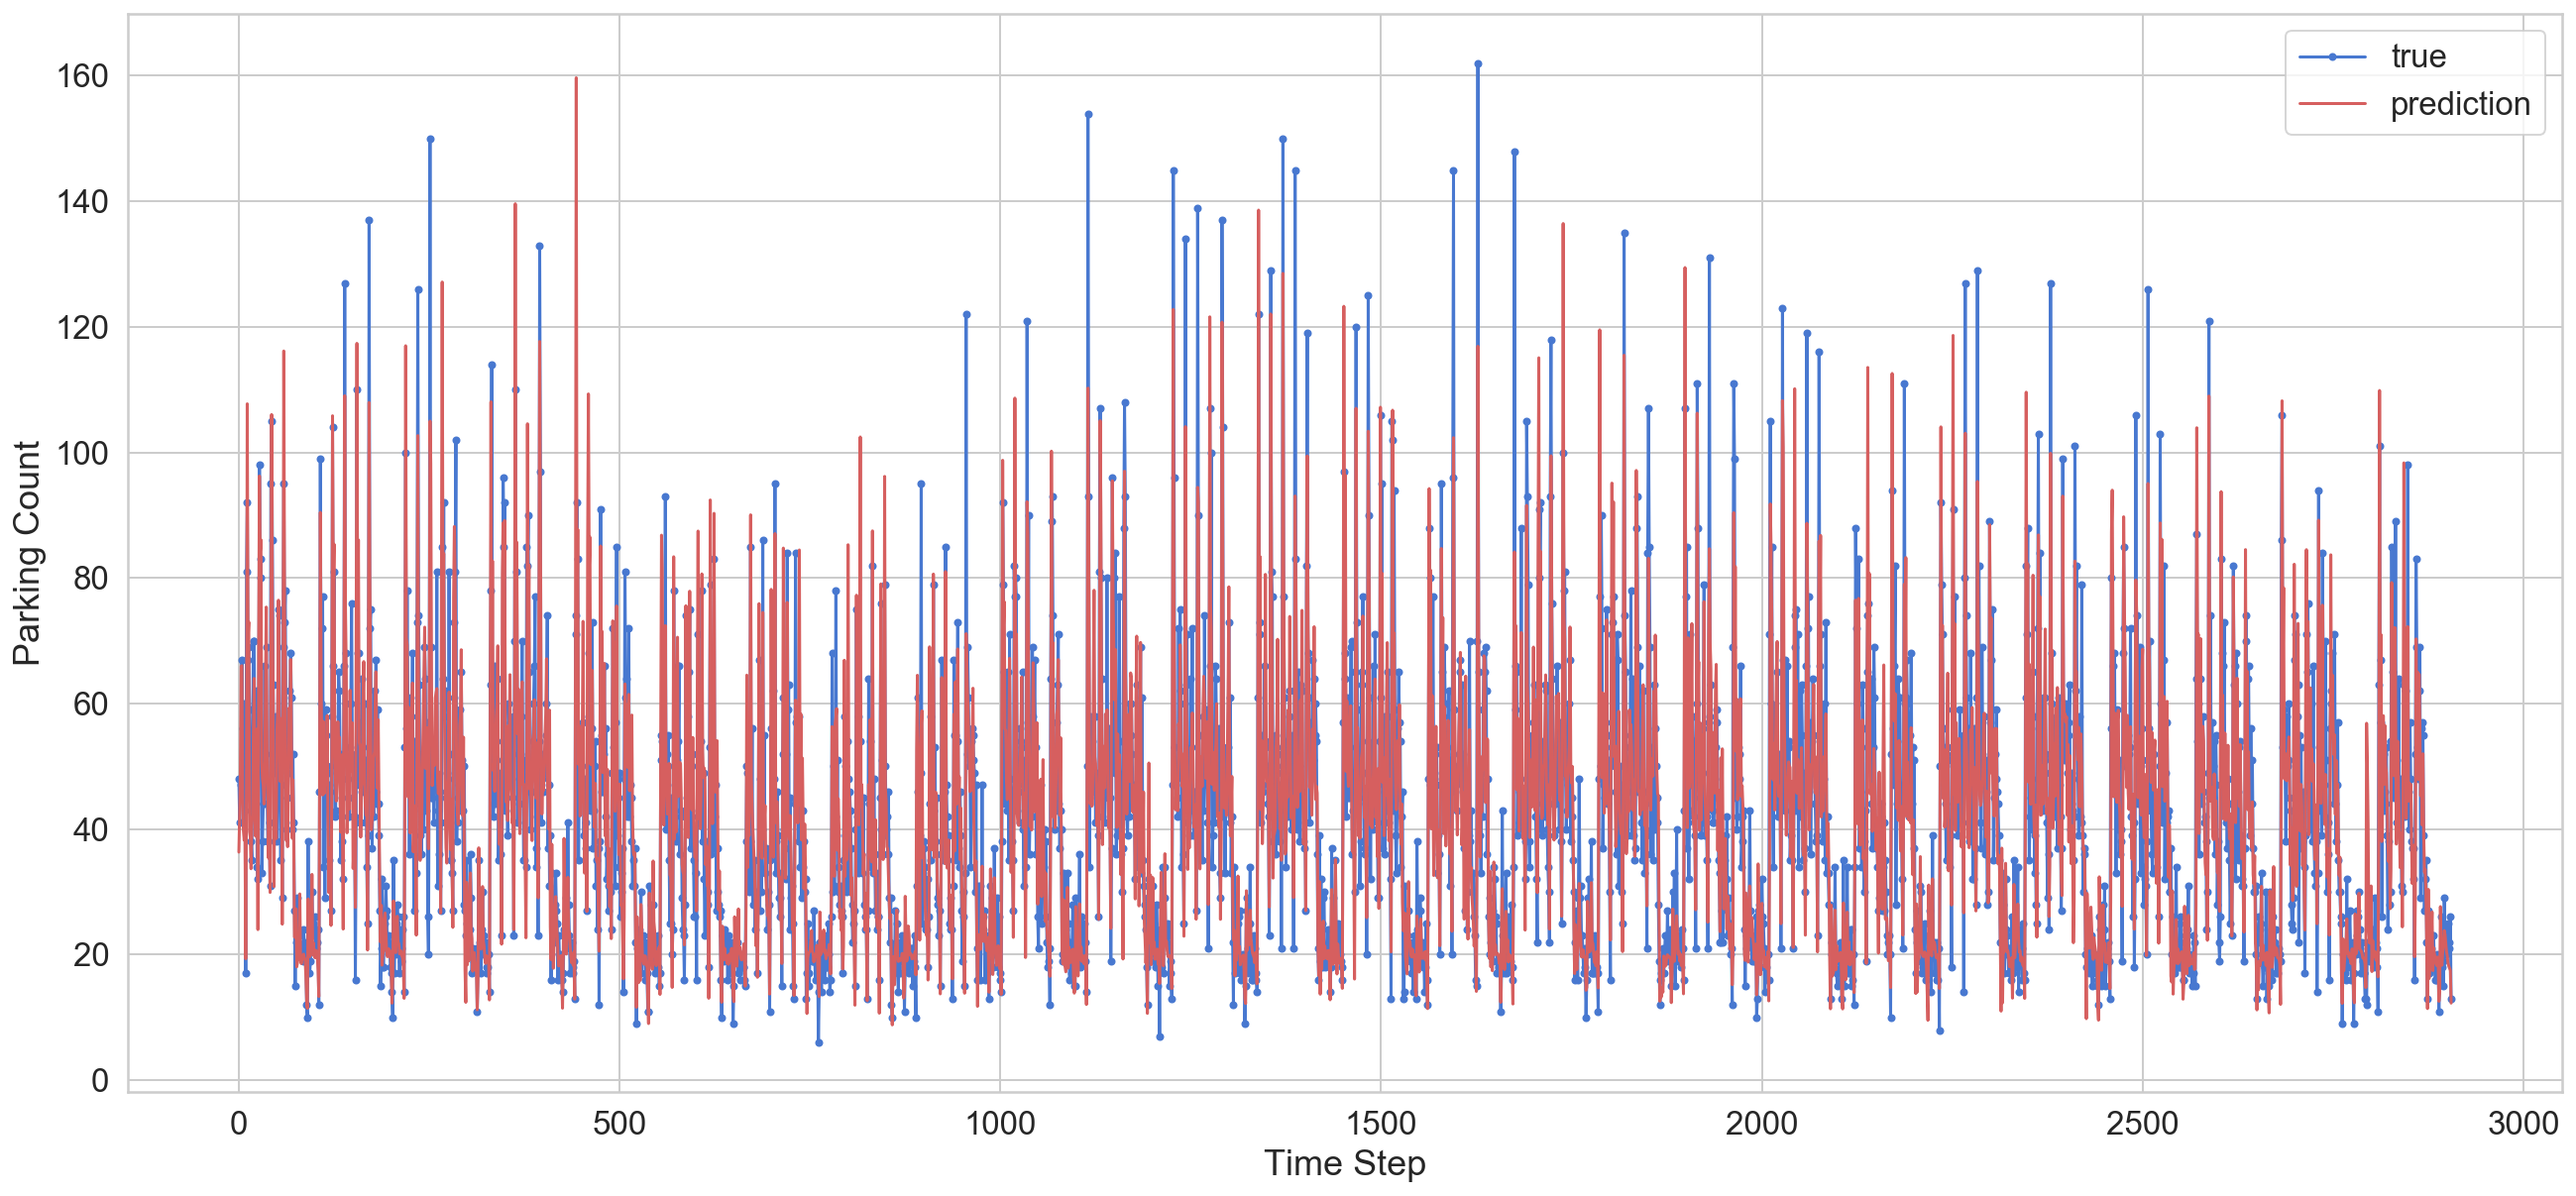

In [17]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Parking Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [18]:
savedf = pd.DataFrame(y_test_inv.flatten(), columns=['real'])
savedf['predict'] = y_pred_inv.flatten()
savedf['accuracy'] = savedf.apply((lambda x : (1 - abs(x['real'] - x['predict']) / x['real']) if x['real']>0 else 1),axis=1)
savedf

,real,predict,accuracy
0,48.0,36.339119,0.757065
1,41.0,42.028744,0.974909
2,47.0,49.735405,0.941800
3,48.0,65.939316,0.626264
4,67.0,66.031410,0.985543
...,...,...,...
2901,25.0,18.623810,0.744952
2902,22.0,18.161779,0.825535
2903,21.0,17.822208,0.848677
2904,26.0,17.481983,0.672384


In [19]:
print("Total Amount of Data Predicted: ", len(savedf))
print()
gt_95 = len(savedf[savedf['accuracy'] >= 0.95])
gt_90 = len(savedf[savedf['accuracy'] >= 0.90])
gt_75 = len(savedf[savedf['accuracy'] >= 0.75])
gt_low = len(savedf[savedf['accuracy'] < 0.75])
print("Predict Accuracy Greather Than 95%: ",gt_95, " - ", round((1 - ((abs((gt_95) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print("Predict Accuracy Greather Than 90%: ",gt_90, " - ", round((1 - ((abs((gt_90) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print()
print("Predict Accuracy Greather Than 75%: ",gt_75, " - ", round((1 - ((abs((gt_75) - len(savedf))) / len(savedf)))*100,2),"% of the Total")
print("Predict Accuracy Lower Than 75%: ",gt_low, " - ", round((1 - ((abs((gt_low) - len(savedf))) / len(savedf)))*100,2),"% of the Total")

Total Amount of Data Predicted:  2906

Predict Accuracy Greather Than 95%:  507  -  17.45 % of the Total
Predict Accuracy Greather Than 90%:  1020  -  35.1 % of the Total

Predict Accuracy Greather Than 75%:  2155  -  74.16 % of the Total
Predict Accuracy Lower Than 75%:  751  -  25.84 % of the Total
